# Logistic Regression

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

## Inspect Data

In [27]:
original_data = pd.read_csv("df.csv")
original_data.head()

,commit,author,date,message,diffLength,isBugfix,isBuggy,path,pathType,tagIndex,...,countStatic,countThis,countThrow,countVar,countAbstract,countGoto,countInclude,countPrint,countRequire,countYield
0,4f7ddab23962a62c1bf2c8883d734e3b61aa965b,anonym,Tue Nov 3 14:13:59 2020 +0100,Bugfix: fixed issue where users without full C...,545.0,1.0,0,php/base/module/detail/DynamicFormActionModule...,.php,564.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9e12609d756fb3718e6ef23e859e4bfa89266f0c,anonym,Tue Nov 3 10:50:51 2020 +0100,ENHANCEMENT - CiBrowserOverview - schema switc...,1658.0,0.0,0,resources/js/base/CiBrowser/CiBrowserOverview.js,.js,726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4d4a292da7cbac135492260fa467e17a9a04de51,anonym,Tue Nov 3 10:50:19 2020 +0100,BUGFIX - DynamicForm - ActionController - remo...,922.0,1.0,0,resources/js/base/BaseView/FormView/DynamicFor...,.js,725.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b51799cca9b75b69bd5e25ca5fe3cecd3658eb22,anonym,Tue Nov 3 09:40:36 2020 +0100,BUGFIX - messageCatalog - hardened code,561.0,1.0,0,resources/js/base/helper/MessageCatalog.js,.js,725.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9064f0108f758a13cbf334f11d0fbc376e3e4052,anonym,Tue Nov 3 09:37:22 2020 +0100,ENHANCEMENT - ItemType - added schema switch,1493.0,0.0,0,php/base/service/overview/ItemTypePermissionOv...,.php,725.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
original_data.isnull().sum()

commit              0
author              0
date                0
message             0
diffLength         73
isBugfix            0
isBuggy             0
path               73
pathType          955
tagIndex            0
countArguments      0
countAwait          0
countBreak          0
countCatch          0
countDebugger       0
countElse           0
countEnum           0
countExport         0
countExtends        0
countFor            0
countFunctions      0
countIfs            0
countImport         0
countInterface      0
countLet            0
countNew            0
countPrivate        0
countProtected      0
countPublic         0
countReturn         0
countStatic         0
countThis           0
countThrow          0
countVar            0
countAbstract       0
countGoto           0
countInclude        0
countPrint          0
countRequire        0
countYield          0
dtype: int64

In [29]:
# Delete row with no path
original_data.dropna(subset = ["path"], inplace=True)
# Fill NULL Values with 0
original_data.fillna(0, inplace=True)

In [30]:
original_data.describe()

,diffLength,isBugfix,isBuggy,tagIndex,countArguments,countAwait,countBreak,countCatch,countDebugger,countElse,...,countStatic,countThis,countThrow,countVar,countAbstract,countGoto,countInclude,countPrint,countRequire,countYield
count,8.725000e+03,8725.000000,8725.000000,8725.000000,8725.000000,8725.0,8725.000000,8725.000000,8725.0,8725.000000,...,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000,8725.000000
mean,9.244751e+03,0.372264,0.010086,213.875645,0.010544,0.0,0.083095,0.011117,0.0,0.251117,...,0.013639,2.372722,0.030946,0.460172,0.010430,0.000917,0.040573,0.021662,0.131003,0.001719
std,1.829580e+05,0.483436,0.099927,254.972755,0.363549,0.0,2.080806,0.333778,0.0,4.667716,...,0.299276,42.488515,1.191713,10.678771,0.533178,0.062422,0.960692,0.588841,2.009528,0.092704
min,1.330000e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.770000e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.115000e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.521000e+03,1.000000,0.000000,427.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.079163e+07,1.000000,1.000000,726.000000,20.000000,0.0,146.000000,25.000000,0.0,259.000000,...,12.000000,2259.000000,81.000000,662.000000,33.000000,5.000000,41.000000,35.000000,114.000000,6.000000


In [31]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8725 entries, 0 to 8797
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   commit          8725 non-null   object 
 1   author          8725 non-null   object 
 2   date            8725 non-null   object 
 3   message         8725 non-null   object 
 4   diffLength      8725 non-null   float64
 5   isBugfix        8725 non-null   float64
 6   isBuggy         8725 non-null   int64  
 7   path            8725 non-null   object 
 8   pathType        8725 non-null   object 
 9   tagIndex        8725 non-null   float64
 10  countArguments  8725 non-null   float64
 11  countAwait      8725 non-null   float64
 12  countBreak      8725 non-null   float64
 13  countCatch      8725 non-null   float64
 14  countDebugger   8725 non-null   float64
 15  countElse       8725 non-null   float64
 16  countEnum       8725 non-null   float64
 17  countExport     8725 non-null   f

array([[<AxesSubplot:title={'center':'diffLength'}>,
        <AxesSubplot:title={'center':'isBugfix'}>,
        <AxesSubplot:title={'center':'isBuggy'}>,
        <AxesSubplot:title={'center':'tagIndex'}>,
        <AxesSubplot:title={'center':'countArguments'}>,
        <AxesSubplot:title={'center':'countAwait'}>],
       [<AxesSubplot:title={'center':'countBreak'}>,
        <AxesSubplot:title={'center':'countCatch'}>,
        <AxesSubplot:title={'center':'countDebugger'}>,
        <AxesSubplot:title={'center':'countElse'}>,
        <AxesSubplot:title={'center':'countEnum'}>,
        <AxesSubplot:title={'center':'countExport'}>],
       [<AxesSubplot:title={'center':'countExtends'}>,
        <AxesSubplot:title={'center':'countFor'}>,
        <AxesSubplot:title={'center':'countFunctions'}>,
        <AxesSubplot:title={'center':'countIfs'}>,
        <AxesSubplot:title={'center':'countImport'}>,
        <AxesSubplot:title={'center':'countInterface'}>],
       [<AxesSubplot:title={'center':

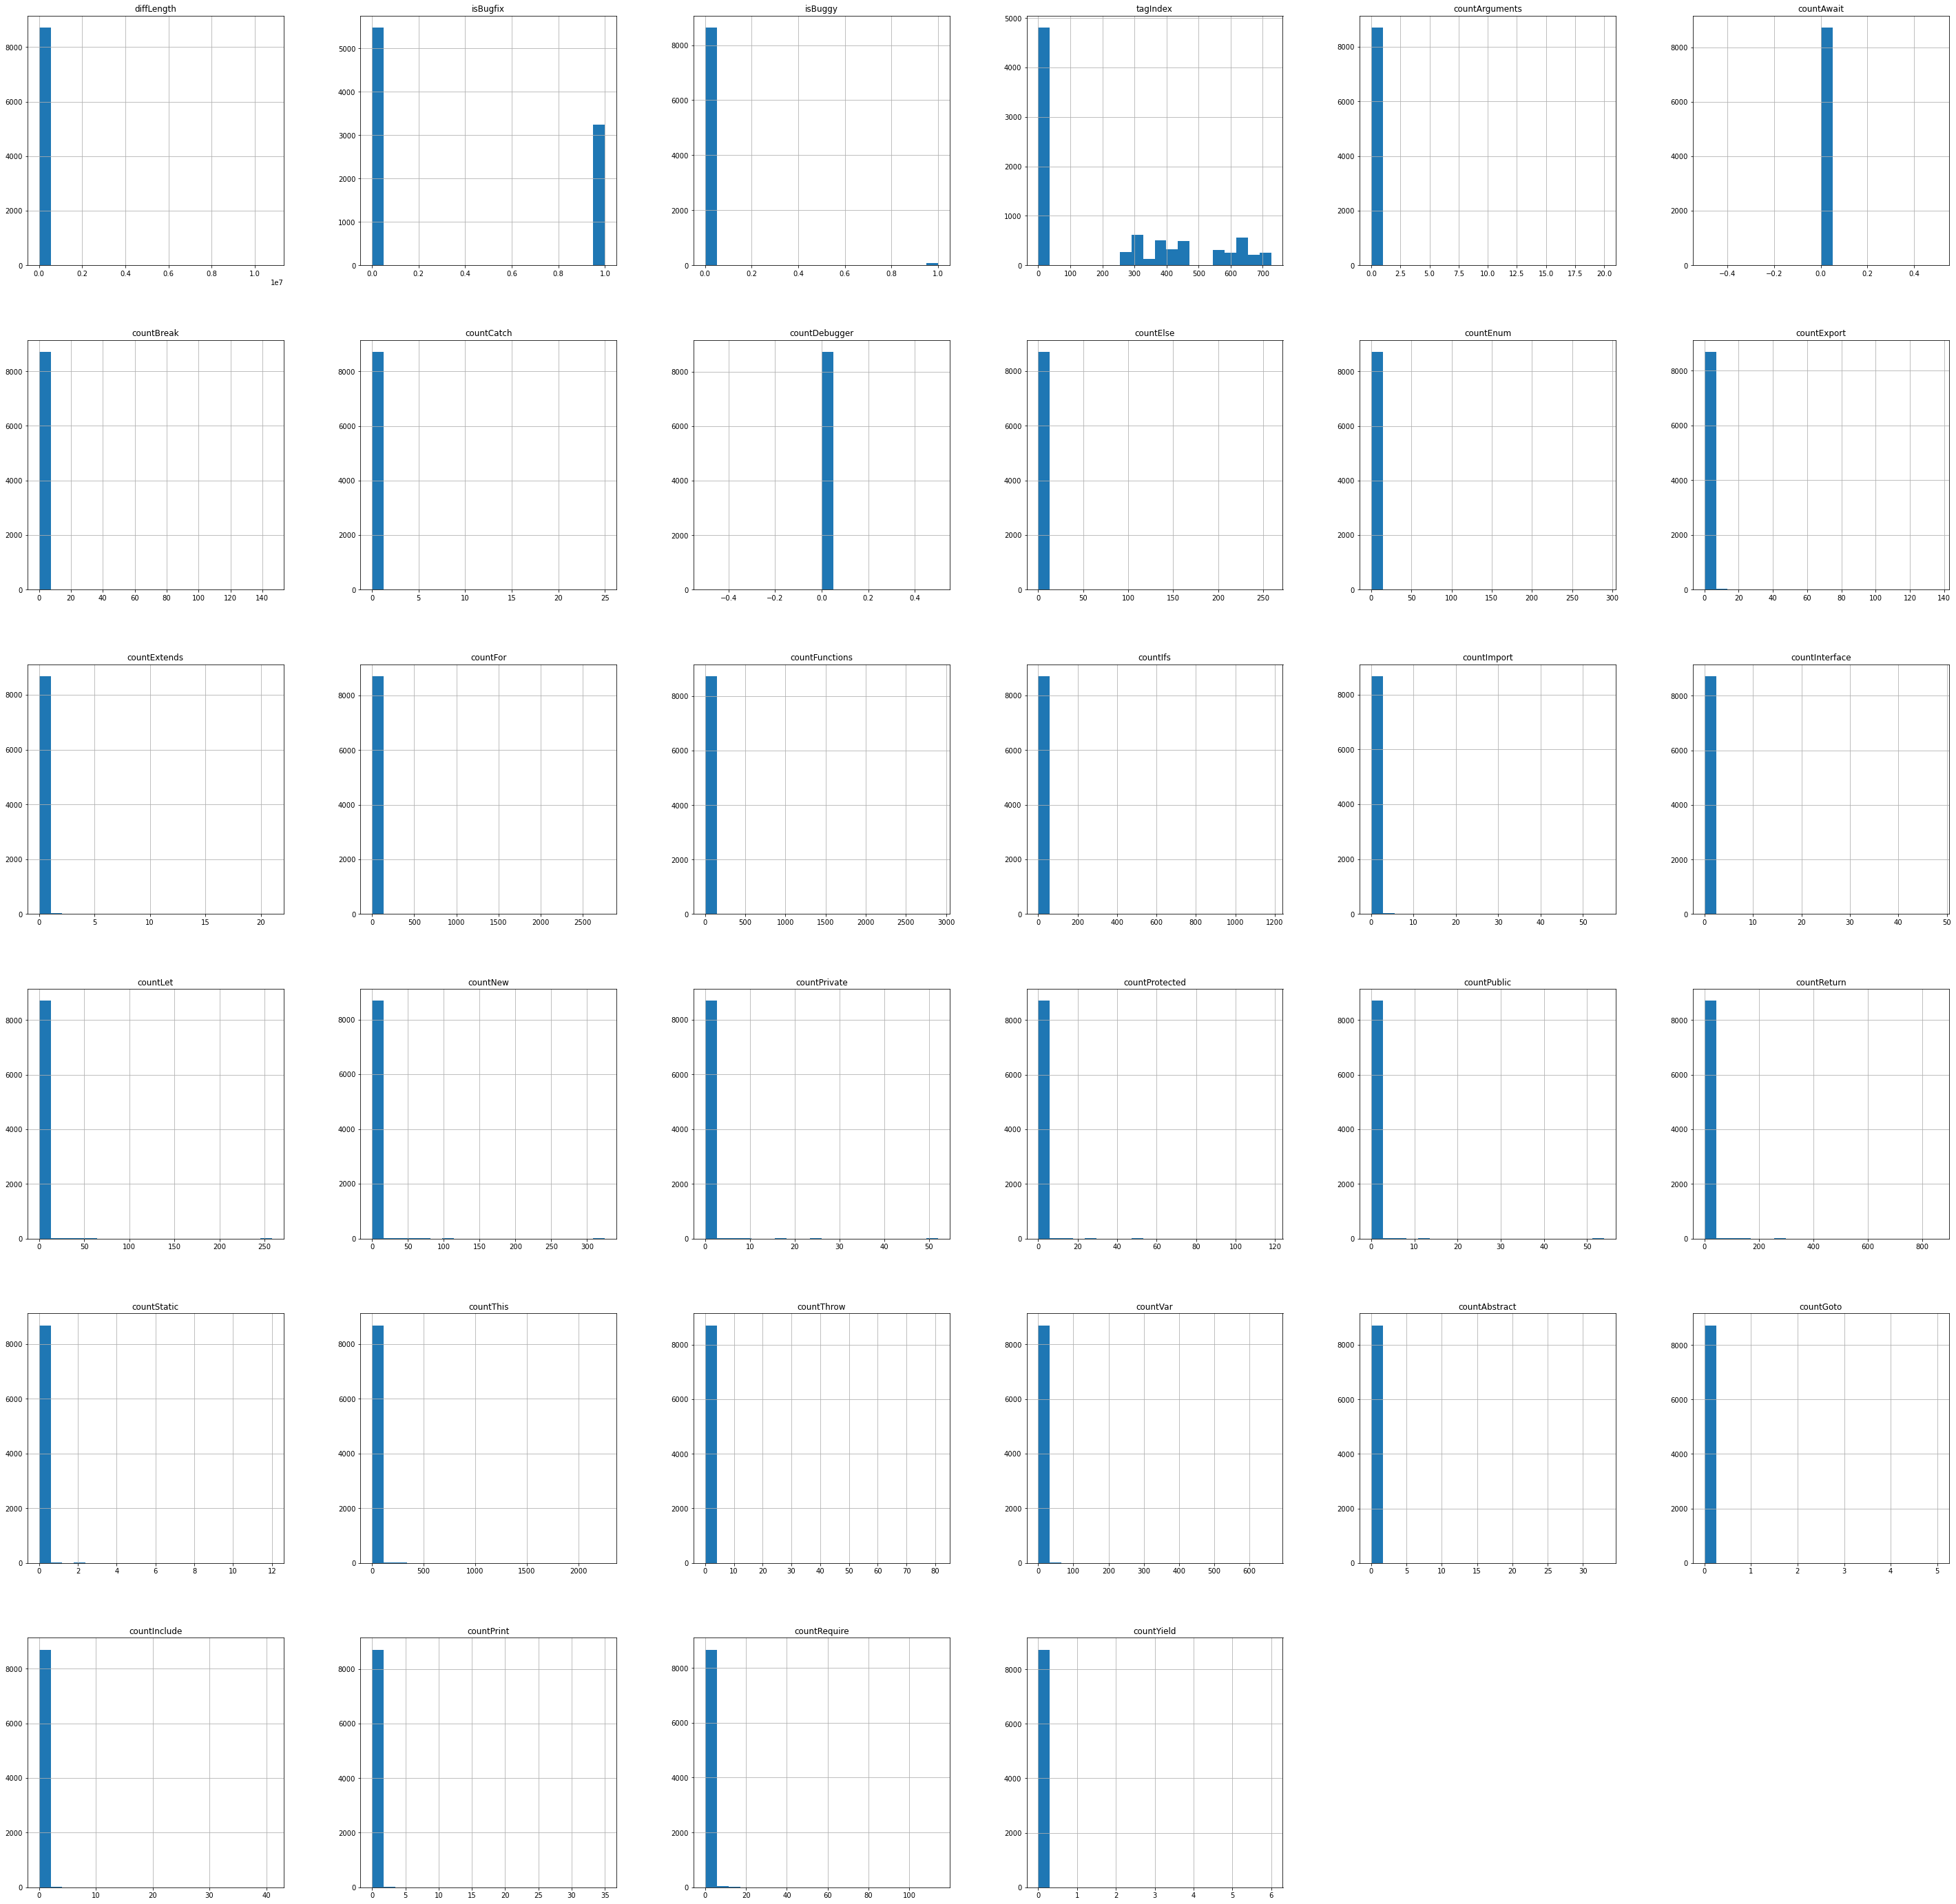

In [32]:
# inspect histogramms to find outliers
original_data.hist(figsize=(50,50), bins=20)

### create Correlation Map to find Features that strongly correlate and therefore can be ignored

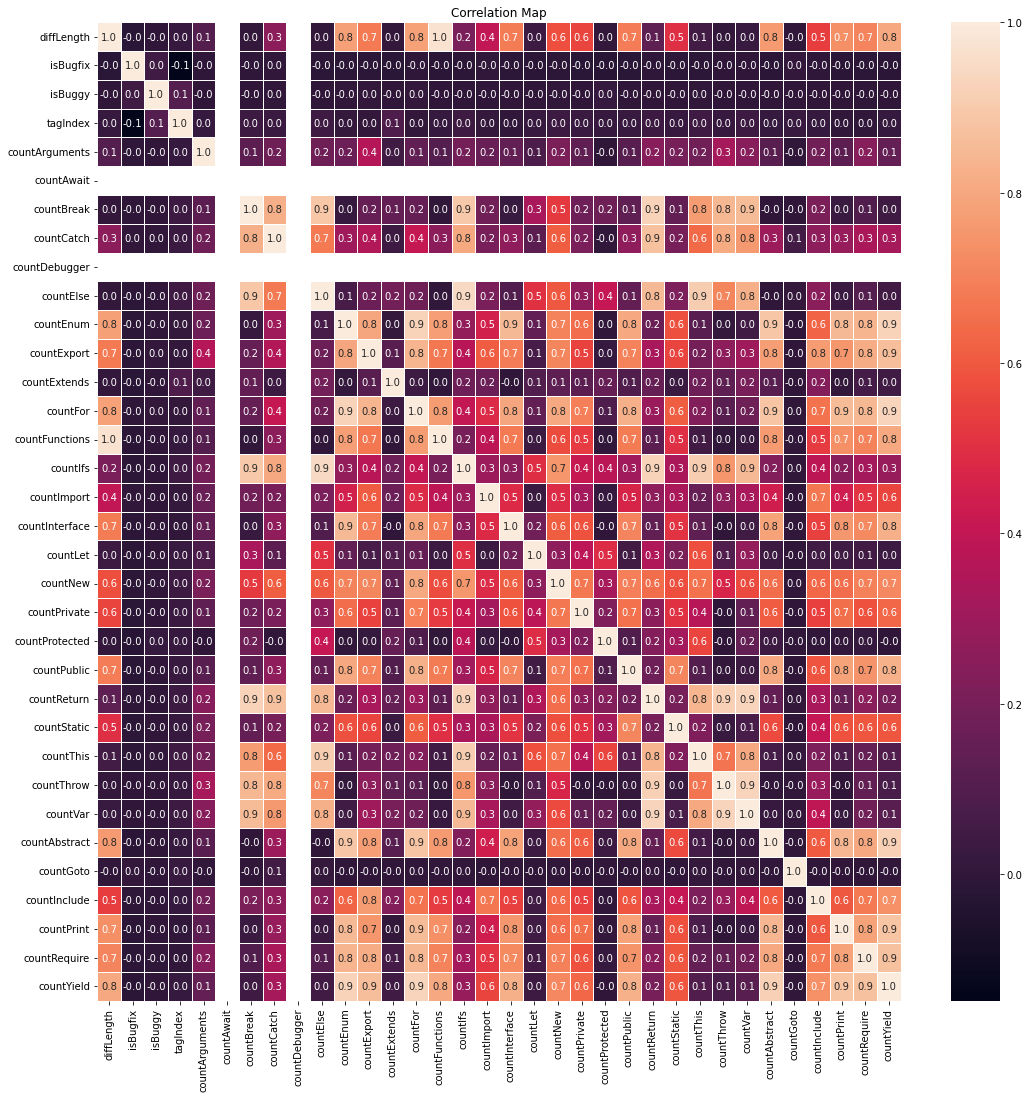

In [33]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(original_data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## Delete Features that correlate or are not relevant for the machine learning algorithm

In [34]:
original_data = original_data.drop(labels="countCatch", axis=1)
original_data = original_data.drop(labels="countDebugger", axis=1)
original_data = original_data.drop(labels="countAwait", axis=1)
original_data = original_data.drop(labels="countElse", axis=1)
original_data = original_data.drop(labels="countFor", axis=1)
original_data = original_data.drop(labels="countFunctions", axis=1)
original_data = original_data.drop(labels="countIfs", axis=1)
original_data = original_data.drop(labels="countInterface", axis=1)
original_data = original_data.drop(labels="countReturn", axis=1)
original_data = original_data.drop(labels="countThis", axis=1)
original_data = original_data.drop(labels="countVar", axis=1)
original_data = original_data.drop(labels="countAbstract", axis=1)
original_data = original_data.drop(labels="countGoto", axis=1)
original_data = original_data.drop(labels="countPrint", axis=1)
original_data = original_data.drop(labels="countRequire", axis=1)
original_data = original_data.drop(labels="countYield", axis=1)

original_data = original_data.drop(labels="commit", axis=1)
original_data = original_data.drop(labels="author", axis=1)
original_data = original_data.drop(labels="date", axis=1)
original_data = original_data.drop(labels="message", axis=1)
original_data = original_data.drop(labels="tagIndex", axis=1)

original_data = original_data.drop(labels="path", axis=1)
original_data = original_data.drop(labels="pathType", axis=1)

### check Correlation Map one more time

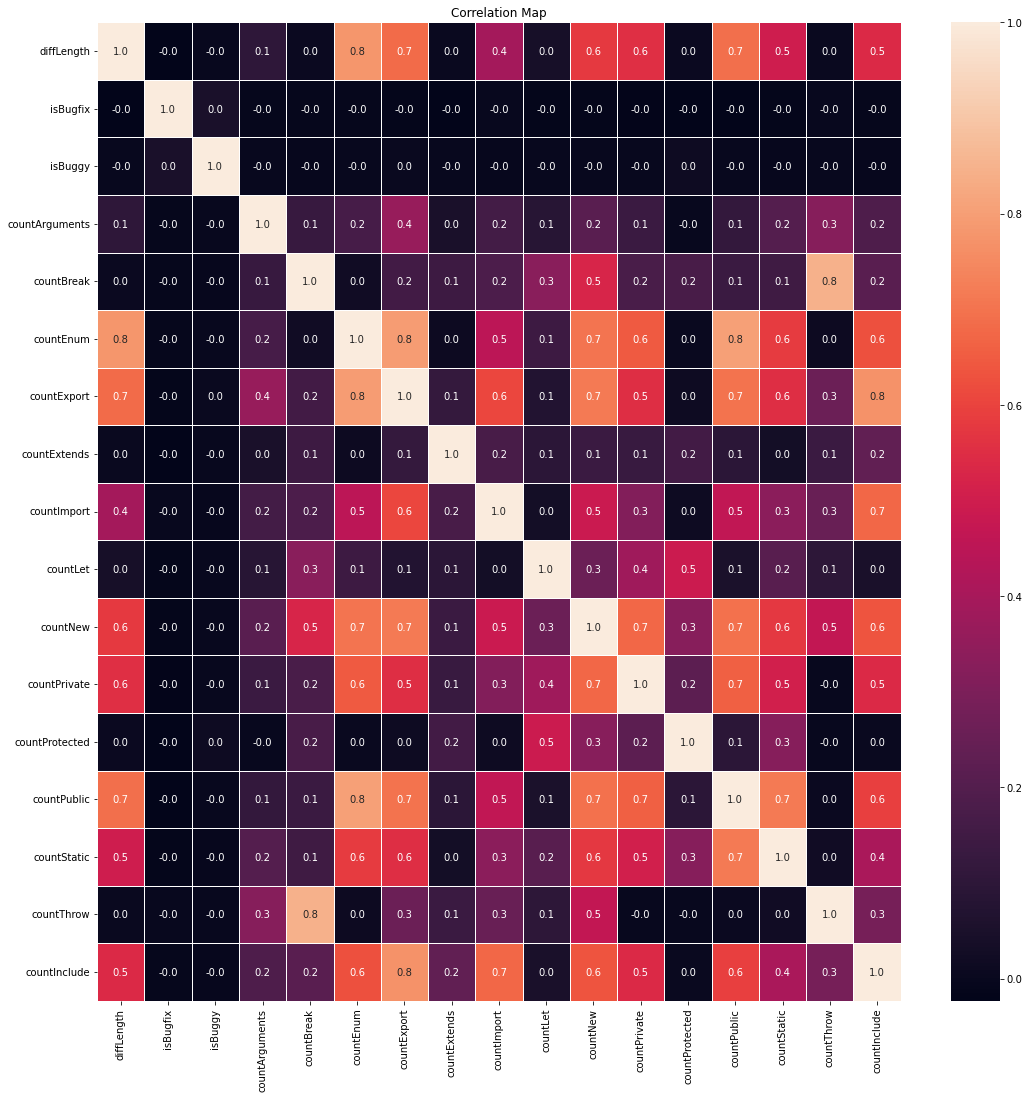

In [35]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(original_data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [36]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8725 entries, 0 to 8797
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diffLength      8725 non-null   float64
 1   isBugfix        8725 non-null   float64
 2   isBuggy         8725 non-null   int64  
 3   countArguments  8725 non-null   float64
 4   countBreak      8725 non-null   float64
 5   countEnum       8725 non-null   float64
 6   countExport     8725 non-null   float64
 7   countExtends    8725 non-null   float64
 8   countImport     8725 non-null   float64
 9   countLet        8725 non-null   float64
 10  countNew        8725 non-null   float64
 11  countPrivate    8725 non-null   float64
 12  countProtected  8725 non-null   float64
 13  countPublic     8725 non-null   float64
 14  countStatic     8725 non-null   float64
 15  countThrow      8725 non-null   float64
 16  countInclude    8725 non-null   float64
dtypes: float64(16), int64(1)
memory u

In [37]:
dataframe = original_data

## perform Oversampling (Data is very unbalanced)

In [38]:
max_size = dataframe['isBuggy'].value_counts().max()
lst = [dataframe]
for class_index, group in dataframe.groupby('isBuggy'):
    lst.append(group.sample(max_size-len(group), replace=True))
frame_new = pd.concat(lst)

In [39]:
target = frame_new['isBuggy']
predictors = frame_new.drop(["isBuggy"], axis=1)

In [40]:
frame_new['isBuggy'].sum()

8637

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.2, random_state=123
)  # 80-20 split into training and test data

In [42]:
# Musterlösung

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model: 

In [43]:
# Musterlösung
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("train performance")
print(classification_report(y_train, logreg.predict(X_train)))
print("test performance")
print(classification_report(y_test, logreg.predict(X_test)))

train performance
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      6903
           1       0.64      0.63      0.63      6916

    accuracy                           0.63     13819
   macro avg       0.63      0.63      0.63     13819
weighted avg       0.63      0.63      0.63     13819

test performance
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1734
           1       0.63      0.63      0.63      1721

    accuracy                           0.63      3455
   macro avg       0.63      0.63      0.63      3455
weighted avg       0.63      0.63      0.63      3455



## create Confusion Matrix to Inspect Results

Text(0.5, 42.0, 'Predicted label')

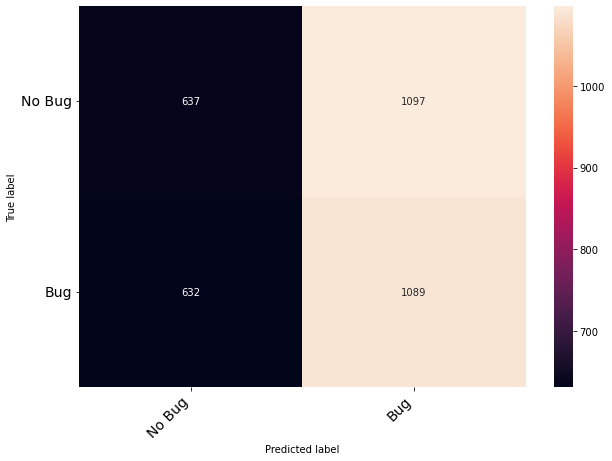

In [44]:
conf_mat = confusion_matrix(y_test, logreg.predict(X_test))
conf_mat[0][0], conf_mat[0][1] = conf_mat[0][1], conf_mat[0][0]
df_cm = pd.DataFrame(
    conf_mat,
    index=["No Bug", "Bug"],
    columns=["No Bug", "Bug"],
)
fig = plt.figure(figsize=[10, 7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=45, ha="right", fontsize=14
)
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [48]:
list(zip(predictors.columns, logreg.coef_[0]))

[('diffLength', -1.2467834090334162),
 ('isBugfix', 0.4818016974892811),
 ('countArguments', -0.7499937146462017),
 ('countBreak', -2.3936480338472),
 ('countEnum', 0.4082165339479033),
 ('countExport', 0.36641447472755484),
 ('countExtends', 0.03785222234906403),
 ('countImport', -0.1423480218985156),
 ('countLet', 0.0021259959116248692),
 ('countNew', 0.31171420375806025),
 ('countPrivate', -0.3303351478242704),
 ('countProtected', 0.6274606088695144),
 ('countPublic', -1.8943523596288092),
 ('countStatic', -0.8542663465132805),
 ('countThrow', -0.16485602336490285),
 ('countInclude', -1.8446209612233917)]

# Decision Tree

In [45]:
# select best performing tree, based on recall
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)
print('--------------------------------------------------------------------------------')
print('Max tree depth: ', 8)
print('Train results: ', classification_report(y_train, tree.predict(X_train)))
print('Test results: ',classification_report(y_test, tree.predict(X_test)))

--------------------------------------------------------------------------------
Max tree depth:  8
Train results:                precision    recall  f1-score   support

           0       0.72      0.76      0.74      6903
           1       0.74      0.70      0.72      6916

    accuracy                           0.73     13819
   macro avg       0.73      0.73      0.73     13819
weighted avg       0.73      0.73      0.73     13819

Test results:                precision    recall  f1-score   support

           0       0.71      0.74      0.72      1734
           1       0.73      0.69      0.71      1721

    accuracy                           0.72      3455
   macro avg       0.72      0.72      0.71      3455
weighted avg       0.72      0.72      0.71      3455



In [50]:
list(zip(predictors.columns, tree.feature_importances_))

[('diffLength', 0.5842092395492591),
 ('isBugfix', 0.17260712916452495),
 ('countArguments', 0.0),
 ('countBreak', 0.0),
 ('countEnum', 0.07288919763130496),
 ('countExport', 0.0),
 ('countExtends', 0.0),
 ('countImport', 0.04140051899008596),
 ('countLet', 0.019584781323482413),
 ('countNew', 0.07462065557620265),
 ('countPrivate', 0.03299773381261686),
 ('countProtected', 0.0),
 ('countPublic', 0.0016907439525230834),
 ('countStatic', 0.0),
 ('countThrow', 0.0),
 ('countInclude', 0.0)]